In [22]:
%load_ext autoreload
%autoreload 2

import rlpg.envs.snake as snake
import rlpg.models.dqn as dqn
import rlpg.trainers.qtrainer as qtrainer
import rlpg.envs.types as rl_envs
import rlpg.models.common as models

import gymnasium as gym
import torchvision.transforms.functional as ttf
import einops
import matplotlib.pyplot as plt
import torch.utils.tensorboard
import numpy as np
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
device = "mps"
img_w = 20
img_h = 20
env, rewards, hparams = snake.snake_image(
    (10,10), 
    (img_w,img_h), 
    device = device,
    init_max_food_count = 60, 

    search_stop = 0.05, 
    search_start = 0.5,
    discount_multiplier = 0.5,

    search_decay = 6_000, 
    reward_multiplier = 100,
    target_update_freq = 1,
    lr = 1e-4
)
policy = dqn.DQN(img_w, img_h, 100, 3, 4)
target = dqn.DQN(img_w, img_h, 100, 3, 4)
tstate = qtrainer.make_train_state(
    env=env,
    evaluator = rewards, 
    policy= policy, 
    target=target, 
    device=device, 
    log_dir="./logs", 
    hparams=hparams
)
qtrainer.train(tstate, episodes=30_000)

Hyperparamters
{"batch_size": 128, "bellman_gamma": 0.99, "bellman_tau": 0.005, "target_update_freq": 1, "grad_clip_value": 100, "search_start": 0.5, "search_stop": 0.05, "search_decay": 6000, "memory_size": 10000, "lr": 0.0001, "board_width": 10, "board_height": 10, "image_width": 20, "image_height": 20, "color": true, "device": "mps", "init_max_food_count": 10, "discount_multiplier": 0.25, "reward_multiplier": 10, "init_max_snake_len": 5, "init_greedy": true, "max_history_discount_steps": 5, "food_schedule_decay": 0.5}


  0%|          | 13/30000 [00:00<26:40, 18.74it/s]


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [62]:
imgs, logits, rewards = qtrainer.evaluate(tstate,max_steps=1000)
print(logits)
print(rewards)
print(tstate.evaluator.total_rewards())
utils.slider(plt.imshow)(imgs)

[tensor([[ 30.7565, 116.4661, 122.3414, 116.6985]], device='mps:0'), tensor([[ 28.3681, 115.1178, 116.8372, 112.8403]], device='mps:0'), tensor([[ 27.1633, 110.9207, 113.0666, 109.4705]], device='mps:0'), tensor([[ 23.8455, 111.4899, 116.1655, 112.3871]], device='mps:0'), tensor([[ 27.1981, 119.0664, 122.5990, 113.4124]], device='mps:0'), tensor([[ 19.4553, 121.8014, 124.4756, 113.6973]], device='mps:0'), tensor([[ 21.4034, 118.7531,  14.1051, 116.6378]], device='mps:0'), tensor([[114.5405, 123.3683,  41.2459,  69.8529]], device='mps:0'), tensor([[119.5682, 129.2168,  43.9551,  15.9560]], device='mps:0'), tensor([[124.4498, 130.7476,  23.1508,  66.5198]], device='mps:0'), tensor([[118.6045, -48.1937,  27.1073,  79.8417]], device='mps:0'), tensor([[122.2113, -13.4623,  85.2724, 114.8744]], device='mps:0'), tensor([[114.7236, -22.2653,  39.7059, 117.4089]], device='mps:0'), tensor([[114.0155,  48.7586, 119.8180, 115.9927]], device='mps:0'), tensor([[ 56.4971,  67.0283, -65.3868, 119.8328

interactive(children=(IntSlider(value=0, description='idx', max=107), Output()), _dom_classes=('widget-interac…

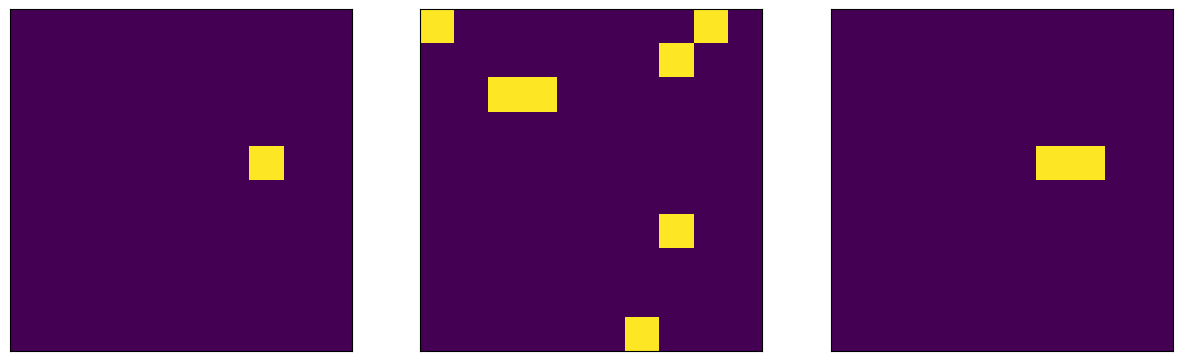

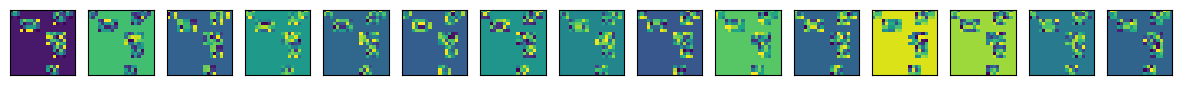

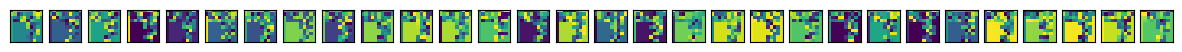

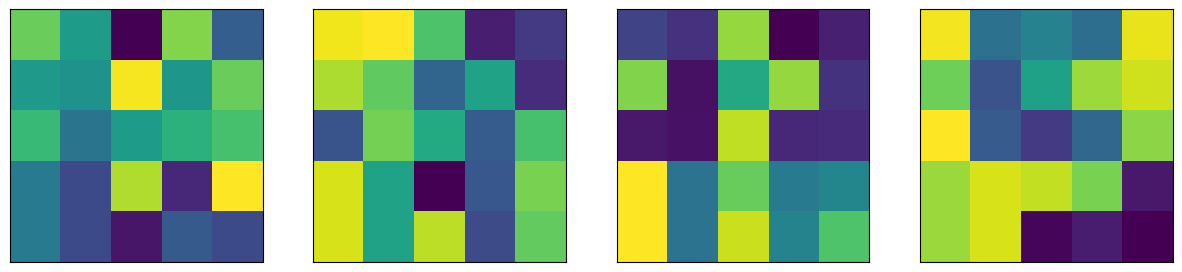

In [33]:
env.reset()
a, _, _, _, _ = env.step(env.action_space.sample())
a = torch.from_numpy(a).to("mps")
utils.plot_conv_block(policy.convs, a)


In [16]:
rewards.

torch.Size([10000, 1])


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, mps:0 and cpu!

In [61]:
mem

tensor([ 0.0000,  9.6250, -0.5000])

In [12]:
import rlpg.rl_memory as memory

mem1 = memory.ReplayMemory(1000, [8], [3])
mem1.push(torch.rand((8,)), torch.rand((3,)), torch.rand((8,)), 0.5)
mem1.push(torch.rand((8,)), torch.rand((3,)), torch.rand((8,)), 0.1)
mem1.push(torch.rand((8,)), torch.rand((3,)), torch.rand((8,)), 0.3)
mem1.push(torch.rand((8,)), torch.rand((3,)), torch.rand((8,)), 0.4)
mem1.push(torch.rand((8,)), torch.rand((3,)), torch.rand((8,)), 0.6)
mem1.states

tensor([[0.6201, 0.9562, 0.9159,  ..., 0.7742, 0.9798, 0.8219],
        [0.0391, 0.2208, 0.6119,  ..., 0.3647, 0.2821, 0.9109],
        [0.3198, 0.3837, 0.4023,  ..., 0.1515, 0.3375, 0.8323],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [13]:
rs = [0,10,0,1,0,0,0,0,0]
mem = mem1.rewards
for i,v in enumerate(rs):
    r = rewards(True, v, 0, i, mem)
    mem[i] = v

rewards(False, 0, 0, i+1, mem)
mem

torch.Size([1000, 1])


tensor([[ 0.0000],
        [10.0000],
        [ 0.0000],
        [ 1.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.